In [1]:
import numpy as np
import xgboost as xgb
import pandas as pd
import pickle
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier

In [2]:
#df = pd.read_pickle('C:/Users/amaca253/Desktop/Friends-Friends-Language-Analysis/BBT/data_emb.pkl')
pca_df = pd.read_pickle('C:/Users/amaca253/Desktop/Friends-Friends-Language-Analysis/BBT/data_300pca.pkl')
#pca_df = pd.read_pickle('C:/Users/amaca253/Desktop/Friends-Friends-Language-Analysis/data_pickle/all_sentences_pca.pkl')

In [3]:
print(pca_df)

           PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0      1.740434 -1.226771 -1.790806  0.160748  0.276928  0.967435  0.432679   
1     -0.698936 -0.339591 -2.598824 -5.010426 -4.463873 -4.014003  4.068122   
2      0.048306 -3.437958 -4.143297  1.145759 -3.859598 -0.221763  1.923108   
3     -3.870769 -0.688815 -0.222997 -2.855845  1.965699 -0.936683  0.575158   
4     -1.727714  0.274235 -3.095411  4.083641  0.154689  0.444743 -0.207593   
...         ...       ...       ...       ...       ...       ...       ...   
44961  0.654350 -3.306279  0.400003  3.959687  1.630808 -0.623478 -0.618093   
44962  0.662833 -0.957341  4.084478  0.849013 -0.812631  0.217842 -1.076910   
44963 -1.160212 -2.111244  6.107976 -0.708805 -1.901350  5.510598 -2.157173   
44964  0.150898 -2.031775  4.695264 -3.753494 -2.313658  2.142983  1.404622   
44965  1.339479 -0.727672  2.430914  1.291655  2.766838  4.112631 -1.980926   

           PCA8      PCA9     PCA10  ...    PCA293 

We create a new dataset, all the class are balanced. We identify the character with the lowest number of sentences. Then we sample sentences for each character with this number.

In [4]:
character = pca_df['Person'].unique()
count = []
for i in character:
    temp = pca_df.loc[pca_df['Person']==str(i)]
    lenght = len(temp)
    count.append(lenght)
minimum = min(count)
print(minimum)

# New balanced dataset
new_df= pca_df.groupby('Person').apply(lambda x: x.sample(n=minimum)).reset_index(drop = True)
print(new_df.pivot_table(index = ['Person'], aggfunc ='size'))

2636
Person
Amy           2636
Bernadette    2636
Howard        2636
Leonard       2636
Penny         2636
Raj           2636
Sheldon       2636
dtype: int64


#### 20 PCA analysis

In [5]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = new_df['Person']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['Amy' 'Amy' 'Amy' ... 'Sheldon' 'Sheldon' 'Sheldon']
[0 0 0 ... 6 6 6]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
['Amy']


C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
# Creation of the dataset
from sklearn.model_selection import train_test_split

X = new_df.loc[:,'PCA1':'PCA20']
X = X.values
one_hot = pd.get_dummies(new_df['Person'])
#y = one_hot.values
y = onehot_encoded
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state = 0)
print(y_train)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [12]:
pred = xgb_model.predict(X_test)
y_pred = np.argmax(pred, axis=1)

y_test2 = np.argmax(y_test, axis=1)


# evaluate predictions
accuracy = accuracy_score(y_test2, y_pred)
print("Accuracy:", (accuracy * 100.0))

# max_depth=7, n_estimators=100, learning_rate=0.44, subsample = 0.25, test size = 1/4
# for 300PCA: Accuracy: 22.157979007294077
# for 30 PCA : Accuracy: 22.878491371642056
# for 25 PCA: 22.825120085394058
# for 20 PCA: accuracy = 23.572318092866038
# for 15 PCA: accuracy = Accuracy: 22.513787582280735
# for 10 PCA: accuracy = 21.92670343355275
# for 2 PCA: 22.56715886852873


# for a balanced dataset the accuracy drop to 16,90 with 20 PCA

[0 1 3 ... 5 2 1]
[2 4 6 ... 6 4 0]
Accuracy: 17.119167615021947


In [17]:
y = integer_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state = 0)
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)




#model= xgb.XGBRegressor(max_depth=7,n_estimators=100, learning_rate=0.44,subsample = 0.25).fit(X_train, y_train)
model = XGBClassifier(max_depth=7,n_estimators=100, learning_rate=0.44,subsample = 0.25).fit(X_train, y_train)


pred = model.predict(X_test)

print('Model summary:')
print(model)
predict_prob = model.predict_proba(X_test)
print('The class order in the model:')
print(model.classes_)

prediction = model.predict(X_test)
print(prediction.shape)
print(y_test.shape)
# Confusion matrix

print("Confusion matrix:\n")
print(pd.crosstab(prediction, y_test), '\n')

# Model score
print('model score',model.score(X_train, y_train))
# Accuracy
print('accuracy_score', accuracy_score(prediction, y_test))
# Misclassification
print('Misclassification rate:', 100*np.sum(prediction != y_test)/y_test.shape[0], "%")

Model summary:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.44, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
The class order in the model:
[0 1 2 3 4 5 6]
(6151,)
(6151,)
Confusion matrix:

col_0    0    1    2    3    4    5    6
row_0                                   
0      168  117  121  112  116  135  120
1      113  168  1

In [ ]:
import matplotlib.pyplot as plt
y_acc = [22.56715886852873, 21.92670343355275, 22.513787582280735, 23.572318092866038, 22.825120085394058, 22.878491371642056, 22.157979007294077]
x_acc = [2, 10, 15, 20, 25, 30, 300]

plt.figure()
plt.plot(x_acc,y_acc)
plt.xlabel('Number of PCA')
plt.ylabel('Accuracy')
plt.show()

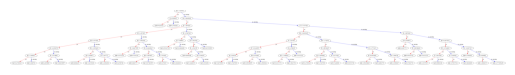

In [19]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
import graphviz

plot_tree(model)
plt.show()



Note: if you're in the IPython notebook, mpld3.show() is not the best command
      to use. Consider using mpld3.display(), or mpld3.enable_notebook().
      See more information at http://mpld3.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [06/Oct/2023 17:54:09] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Oct/2023 17:54:10] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [06/Oct/2023 17:54:10] "GET /mpld3.js HTTP/1.1" 200 -
127.0.0.1 - - [06/Oct/2023 17:54:10] code 404, message Not Found
127.0.0.1 - - [06/Oct/2023 17:54:10] "GET /favicon.ico HTTP/1.1" 404 -



stopping Server...


<Figure size 640x480 with 0 Axes>

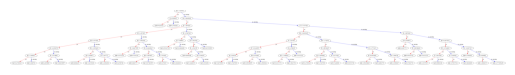

In [21]:
import mpld3
mpld3.enable_notebook()

plt.figure()
plot_tree(model)
mpld3.show()

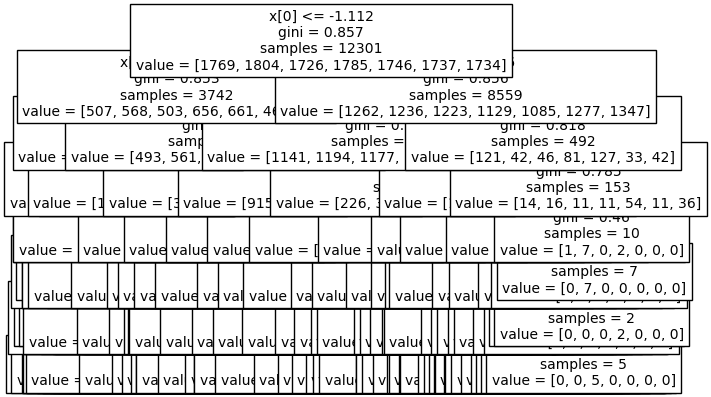

In [20]:
from sklearn import tree
import matplotlib.pyplot as plt

# load data
X, y = X_train, y_train

# create and train model
clf = tree.DecisionTreeClassifier(max_depth=7)  # set hyperparameter
clf.fit(X, y)

# plot tree
plt.figure()  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10)
plt.show()